In [1]:
#| default_exp 02.01_k_means

In [2]:
from IPython.display import Markdown, display

##### Imports

In [3]:
#|export
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial

from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

#### Create Data

In [4]:
#|export
n_clusters = 5
n_samples = 200

Create K-Initial Centroids

In [5]:
#|export
centroids = torch.rand(n_clusters, 2)*70-35

In [6]:
centroids, centroids.shape

(tensor([[ -0.2565,  11.9758],
         [ 31.8146,  -9.4669],
         [-30.6689, -14.6096],
         [-24.6184, -11.3162],
         [-13.5898, -19.0985]]),
 torch.Size([5, 2]))

In [7]:
#|export
def sample(m):
    return MultivariateNormal(m, torch.diag(tensor([5., 5.]))).sample((n_samples,))

In [8]:
#|export
slices = [sample(c) for c in centroids]
data = torch.cat(slices)

In [9]:
data.shape, data

(torch.Size([1000, 2]),
 tensor([[  0.3628,  13.5474],
         [ -0.2425,  12.0497],
         [ -2.0034,  14.6690],
         ...,
         [-17.3700, -15.4554],
         [-14.3995, -20.6892],
         [ -7.3948, -21.7927]]))

In [10]:
gpu_X = data.clone().cuda()
gpu_centroids = centroids.clone().cuda()

In [11]:
# clear plot
plt.clf()

<Figure size 640x480 with 0 Axes>

Plot the data and centroids

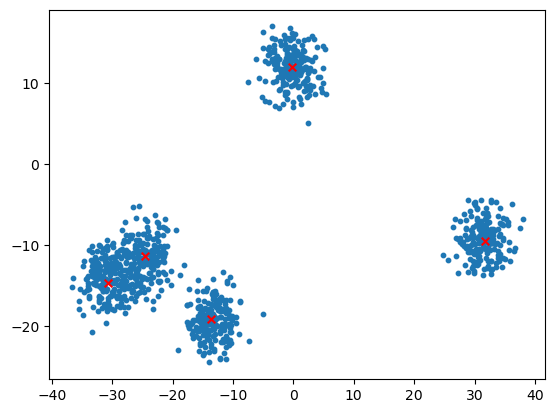

In [12]:
# plot data
plt.scatter(data[:,0], data[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='red', s=30)

In [13]:
data[0]-centroids[0]

tensor([0.6193, 1.5716])

In [14]:
torch.norm(data[0]-centroids[0])

tensor(1.6892)

In [15]:
torch.norm(data[0]-centroids[0], dim=-1)

tensor(1.6892)

##### Assing Data to Centroids

Get Euclidean Distance

In [16]:
#|export
def euclidean_dist(a, b):
    return torch.norm(a-b, dim=-1)

Assign to nearest centroid

In [17]:
data[0].shape, data.shape, data.unsqueeze(1).shape, data.unsqueeze(1)

(torch.Size([2]),
 torch.Size([1000, 2]),
 torch.Size([1000, 1, 2]),
 tensor([[[  0.3628,  13.5474]],
 
         [[ -0.2425,  12.0497]],
 
         [[ -2.0034,  14.6690]],
 
         ...,
 
         [[-17.3700, -15.4554]],
 
         [[-14.3995, -20.6892]],
 
         [[ -7.3948, -21.7927]]]))

In [18]:
centroids.shape, centroids.unsqueeze(0).shape, centroids.unsqueeze(0), centroids.unsqueeze(0)[:,:,1]

(torch.Size([5, 2]),
 torch.Size([1, 5, 2]),
 tensor([[[ -0.2565,  11.9758],
          [ 31.8146,  -9.4669],
          [-30.6689, -14.6096],
          [-24.6184, -11.3162],
          [-13.5898, -19.0985]]]),
 tensor([[ 11.9758,  -9.4669, -14.6096, -11.3162, -19.0985]]))

In [19]:
distances = euclidean_dist(data.unsqueeze(1), centroids.unsqueeze(0))

In [20]:
cluster_assignments = torch.argmin(distances, dim=1)

In [21]:
cluster_assignments

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
def plot_clusters(data, centroids, assignments):
    plt.clf()
    plt.scatter(data[:,0], data[:,1], c=assignments, s=10)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='red', s=30)

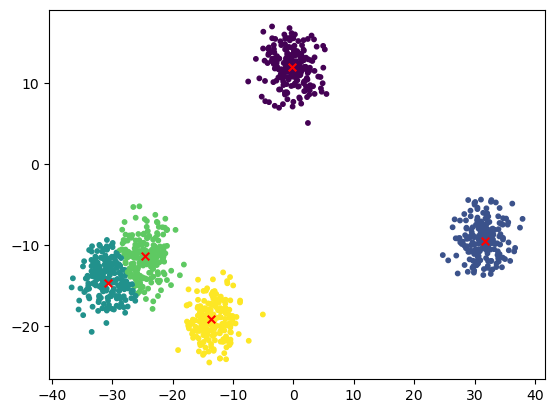

In [23]:
plot_clusters(data, centroids, cluster_assignments)

In [24]:
#|export
def assign_to_nearest_centroid(data, centroids):
    distances = euclidean_dist(data.unsqueeze(1), centroids.unsqueeze(0))
    cluster_assignments = torch.argmin(distances, dim=1)
    return cluster_assignments

In [25]:
updated_centroids = torch.zeros_like(centroids)
updated_centroids

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [26]:
data[cluster_assignments==3]

tensor([[-26.2932, -14.0186],
        [-25.7762, -15.9477],
        [-27.8014, -12.0751],
        [-28.1168,  -9.3645],
        [-27.7869, -12.2422],
        [-28.7744, -10.6482],
        [-26.8287, -12.3256],
        [-26.3086, -15.0724],
        [-26.2268, -12.9534],
        [-25.4618, -15.7175],
        [-27.0113, -13.8982],
        [-26.7309, -12.8452],
        [-26.3894, -11.5307],
        [-25.3622, -12.3016],
        [-24.8530,  -8.6692],
        [-23.5433, -10.7628],
        [-20.9324, -10.0893],
        [-24.0643, -15.3631],
        [-27.4531, -11.5098],
        [-25.1605, -12.1228],
        [-26.4714, -12.2629],
        [-26.8163,  -9.0901],
        [-25.8526, -13.4875],
        [-24.4262, -16.6425],
        [-22.4279, -13.5905],
        [-21.4129, -10.9261],
        [-25.3836, -11.6407],
        [-20.2373, -13.1543],
        [-23.7354, -11.2686],
        [-20.9081,  -8.0849],
        [-24.3138, -11.9451],
        [-24.9319, -12.0724],
        [-22.7782, -10.3638],
        [-

In [27]:
# for i in range(n_clusters):
#     assigned_points = data[cluster_assignments==i]
#     if len(assigned_points) > 0:
#         updated_centroids[i] = assigned_points.mean(dim=0)

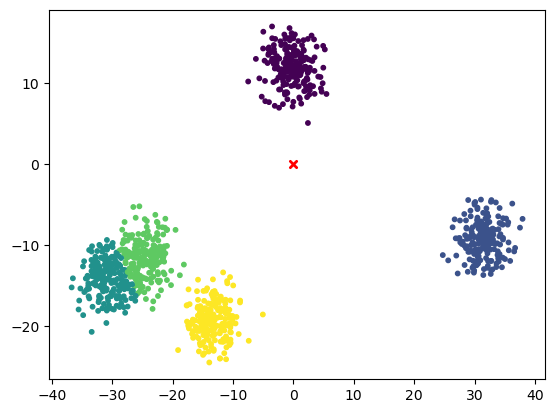

In [28]:
plot_clusters(data, updated_centroids, cluster_assignments)

##### Update Centroids

In [29]:
#|export
def update_centroids(data, cluster_assignments, n_clusters):
    updated_centroids = torch.zeros(n_clusters, data.shape[-1])
    for i in range(n_clusters):
        assigned_points = data[cluster_assignments == i]
        if len(assigned_points) > 0:
            updated_centroids[i] = torch.mean(assigned_points, dim=0)
    return updated_centroids

##### K-Means Loop

In [31]:
#|export
def k_means(data, n_clusters=5, max_iterations=10, tolerance=1e-4, centroids=None):
    converged = False

    for iteration in range(max_iterations):
        # assign data points to nearest centroid
        cluster_assignments = assign_to_nearest_centroid(data, centroids)
        # update centroids
        updated_centroids = update_centroids(data, cluster_assignments, n_clusters)

        # check for convergence
        centroid_change = torch.norm(updated_centroids - centroids)
        if centroid_change < tolerance:
            converged = True
            print(f'Converged after {iteration} iterations')
            break

        centroids = updated_centroids

    if not converged:
        print(f'Failed to converge after {max_iterations} iterations')

In [32]:
centroids = torch.rand(n_clusters, 2)*70-35

In [33]:
# k_means(data, n_clusters, centroids=centroids)

In [34]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [35]:
centroids = torch.rand(n_clusters, 2)*70-35

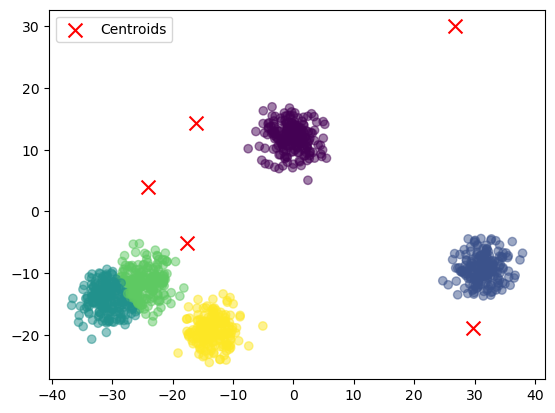

In [36]:
fig, ax = plt.subplots()

# Set up the initial plot
scatter = ax.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
centroid_plot = ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax.legend()

In [37]:
def init():
    return scatter, centroid_plot

In [38]:
def update(frame):
    global data, centroids, cluster_assignments
    
    # Step 1: Assign data points to the nearest centroid
    cluster_assignments = assign_to_nearest_centroid(data, centroids)

    # Step 2: Update centroids
    updated_centroids = update_centroids(data, cluster_assignments, n_clusters)

    # Update plot
    scatter.set_array(cluster_assignments)
    centroid_plot.set_offsets(updated_centroids.numpy())
    centroids = updated_centroids
    
    return scatter, centroid_plot

In [39]:
# Create the animation object
ani = FuncAnimation(fig, update, frames=10, init_func=init, blit=True, interval=200, repeat=False)
plt.close()
HTML(ani.to_jshtml())

##### Create GPU Batched K-Means

In [40]:
bs = 5 
gpu_x = gpu_X[:bs]

In [41]:
#|export
def k_means_gpu(data, n_clusters=5, max_iterations=10, tolerance=1e-4, centroids=None):
    converged = False
    data = data.cuda()
    if centroids is not None:
        centroids = centroids.cuda()
    else:
        # Initialize centroids if they were not provided
        centroids = torch.rand(n_clusters, data.shape[-1], device='cuda') * (data.max(dim=0).values - data.min(dim=0).values) + data.min(dim=0).values


        for iteration in range(max_iterations):
            # assign data points to nearest centroid
            cluster_assignments = assign_to_nearest_centroid(data, centroids)
            # update centroids
            updated_centroids = update_centroids(data, cluster_assignments, n_clusters)

            # check for convergence
            centroid_change = torch.norm(updated_centroids - centroids)
            if centroid_change < tolerance:
                converged = True
                print(f'Converged after {iteration} iterations')
                break

            centroids = updated_centroids

    if not converged:
        print(f'Failed to converge after {max_iterations} iterations')

In [42]:
gpu_centroids = torch.rand(n_clusters, 2, device=gpu_x.device)*70-35

In [43]:
n_clusters

5

In [44]:
# check if gpu_X is on the GPU
gpu_X.device

device(type='cuda', index=0)

In [45]:
# check if gpu_centroids is on the GPU
gpu_centroids.device

device(type='cuda', index=0)

In [46]:
centroids = torch.rand(n_clusters, 2)*70-35

In [50]:
%timeit -n 5 k_means_gpu(gpu_X, centroids=gpu_centroids)

Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 

In [51]:
%timeit -n 5 k_means(data, centroids=centroids)

Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 10 iterations
Failed to converge after 

In [49]:
import nbdev
nbdev.export.nb_export('./02.01_pb_k_means.ipynb', '02.01_k_means')
print("export successful")

export successful
